# All Modality Exploration


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Grouping Analysis
In this notebook we take a look at each of the modalities and group individuals based:
1. established thresholds
2. natural cutpoints
3. and data-driven clusters

The plan is to create functions/classes here that can be adapted into the source code for future analysis.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.dates as mdates

from scipy import stats

# Table of Contents

1. [Fitbit Sleep](#fitbit_sleep)
2. [Self-Report Sleep](#self_report_sleep)
3. [Fitbit Activity](#fitbit_activity)
4. [Mood](#mood)
5. [Indoor Environmental Quality](#ieq)

<a id='fitbit_sleep'></a>

# Fitbit Sleep

## Data Import

In [3]:
fb_sleep = pd.read_csv("../data/processed/fitbit-sleep_summary-ux_s20.csv",parse_dates=["start_time","end_time","start_date","end_date"])#,index_col=["beiwe","start_time"])
fb_sleep.head()

,start_date,end_date,deep_count,deep_minutes,light_count,light_minutes,rem_count,rem_minutes,wake_count,wake_minutes,beiwe,efficiency,end_time,start_time,redcap,beacon,nrem_count,rem2nrem_count,nrem_minutes,rem2nrem_minutes,tst_fb
0,2020-05-14,2020-05-14,5,84,20,213,10,82,21,27,hfttkth7,97,2020-05-14 07:13:00,2020-05-14 00:27:00,NaN,NaN,25,0.400000,297,0.276094,6.766667
1,2020-05-14,2020-05-15,4,95,31,250,6,47,33,101,hfttkth7,87,2020-05-15 08:06:30,2020-05-14 23:53:30,NaN,NaN,35,0.171429,345,0.136232,8.216667
2,2020-05-15,2020-05-16,2,47,17,190,8,50,20,42,hfttkth7,95,2020-05-16 04:57:00,2020-05-15 23:28:00,NaN,NaN,19,0.421053,237,0.210970,5.483333
3,2020-05-17,2020-05-17,5,78,21,242,11,83,25,44,hfttkth7,96,2020-05-17 09:28:30,2020-05-17 02:01:30,NaN,NaN,26,0.423077,320,0.259375,7.450000
4,2020-05-18,2020-05-18,5,96,20,167,14,88,28,65,hfttkth7,92,2020-05-18 07:20:00,2020-05-18 00:24:00,NaN,NaN,25,0.560000,263,0.334601,6.933333


<a id='self_report_sleep'></a>

# Self-Report Sleep

In [13]:
beiwe_sleep = pd.read_csv("../data/processed/beiwe-morning_ema-ux_s20.csv",parse_dates=["timestamp"])#,index_col=["beiwe","timestamp"])
#beiwe_sleep.sort_index(level="beiwe",inplace=True)
beiwe_sleep.head()

,timestamp,beiwe,content,stress,lonely,sad,energy,tst,sol,naw,restful,redcap,beacon
0,2020-05-13 09:10:27,qh34m4r9,3,0.0,0.0,0.0,1.0,8.0,20.0,2.0,3.0,68,19.0
1,2020-05-13 09:15:49,awa8uces,0.0,2.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,28,26.0
2,2020-05-13 09:42:19,xxvnhauv,1,1.0,1.0,3.0,0.0,6.0,30.0,3.0,1.0,21,22.0
3,2020-05-13 09:43:27,rvhdl2la,1,1.0,2.0,3.0,0.0,5.3,5.0,2.0,2.0,29,NaN
4,2020-05-13 10:11:51,q5y11ytm,3,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,48,NaN


<a id='fitbit_activity'></a>

# Fitbit Activity

In [5]:
fb_activity = pd.read_csv("../data/processed/fitbit-daily-ux_s20.csv",parse_dates=["timestamp"],index_col=["beiwe","timestamp"])
fb_activity.head()

calories     bmr  steps  distance  sedentary_minutes  \
beiwe    timestamp                                                          
hfttkth7 2020-05-13    2781.0  1876.0   9207  4.396294               1241   
         2020-05-14    3727.0  1876.0  15207  7.261114                614   
         2020-05-15    3909.0  1876.0  14556  8.028501                577   
         2020-05-16    3927.0  1876.0  18453  8.748670                760   
         2020-05-17    4180.0  1876.0  15425  7.973149                605   

                     lightly_active_minutes  fairly_active_minutes  \
beiwe    timestamp                                                   
hfttkth7 2020-05-13                      70                    118   
         2020-05-14                     263                    134   
         2020-05-15                     205                     57   
         2020-05-16                     176                     24   
         2020-05-17                     207                     50   

                     very_active_minutes  calories_from_activities     bmi  \
beiwe    timestamp                                                           
hfttkth7 2020-05-13                   11                    1097.0  23.754   
         2020-05-14                   23                    2234.0  23.754   
         2020-05-15                  108                    2381.0  23.754   
         2020-05-16                  151                    2364.0  23.754   
         2020-05-17                  131                    2652.0  23.754   

                     fat  weight  food_calories_logged  water_logged  
beiwe    timestamp                                                    
hfttkth7 2020-05-13  0.0   180.0                   0.0           0.0  
         2020-05-14  0.0   180.0                   0.0           0.0  
         2020-05-15  0.0   180.0                   0.0           0.0  
         2020-05-16  0.0   180.0                   0.0           0.0  
         2020-05-17  0.0   180.0                   0.0           0.0

<a id='mood'></a>

# Mood

In [6]:
mood = pd.read_csv("../data/processed/beiwe-daily_ema-ux_s20.csv",parse_dates=["timestamp_morning","timestamp_evening","date"],index_col=["beiwe","date"])
mood.sort_index(level="beiwe",inplace=True)
mood.head()

timestamp_morning content_morning  stress_morning  \
beiwe    date                                                             
15tejjtw 2020-05-14 2020-05-14 20:38:28               2             0.0   
         2020-05-16 2020-05-16 23:10:04               3             0.0   
         2020-05-17 2020-05-17 16:58:09               2             0.0   
         2020-05-20 2020-05-20 11:19:29               2             1.0   
         2020-05-22 2020-05-22 10:27:23               3             1.0   

                     lonely_morning  sad_morning  energy_morning  tst   sol  \
beiwe    date                                                                 
15tejjtw 2020-05-14             1.0          1.0             2.0  9.0  30.0   
         2020-05-16             1.0          0.0             2.0  9.0  15.0   
         2020-05-17             1.0          0.0             1.0  9.0  30.0   
         2020-05-20             1.0          0.0             2.0  8.0  15.0   
         2020-05-22             1.0          2.0             3.0  9.0  20.0   

                     naw  restful  redcap  beacon   timestamp_evening  \
beiwe    date                                                           
15tejjtw 2020-05-14  5.0      2.0      45     NaN 2020-05-14 20:37:44   
         2020-05-16  2.0      2.0      45     NaN 2020-05-16 23:09:42   
         2020-05-17  1.0      2.0      45     NaN 2020-05-17 22:11:03   
         2020-05-20  3.0      2.0      45     NaN 2020-05-20 19:48:42   
         2020-05-22  2.0      2.0      45     NaN 2020-05-22 19:44:15   

                     content_evening  stress_evening  lonely_evening  \
beiwe    date                                                          
15tejjtw 2020-05-14              2.0             0.0             2.0   
         2020-05-16              3.0             0.0             1.0   
         2020-05-17              3.0             0.0             1.0   
         2020-05-20              2.0             2.0             1.0   
         2020-05-22              2.0             1.0             2.0   

                     sad_evening  energy_evening  content_mean  stress_mean  \
beiwe    date                                                                 
15tejjtw 2020-05-14          1.0             2.0           2.0          0.0   
         2020-05-16          0.0             2.0           3.0          0.0   
         2020-05-17          0.0             2.0           3.0          0.0   
         2020-05-20          1.0             1.0           2.0          1.5   
         2020-05-22          1.0             1.0           2.0          1.0   

                     lonely_mean  sad_mean  energy_mean  
beiwe    date                                            
15tejjtw 2020-05-14          1.5       1.0          2.0  
         2020-05-16          1.0       0.0          2.0  
         2020-05-17          1.0       0.0          1.5  
         2020-05-20          1.0       0.5          1.5  
         2020-05-22          1.5       1.5          2.0

<a id='ieq'></a>

# Indoor Environmental Quality

In [7]:
ieq_raw = pd.read_csv("../data/processed/beacon-fb_and_gps_filtered_summary-ux_s20.csv",parse_dates=["start_time","end_time",])
ieq_raw.drop([c for c in ieq_raw.columns if c.endswith("percent") or c.endswith("mean")],axis="columns",inplace=True)
for bad_label in ["long","lat","accuracy","altitude","rh","lux","pm1","number"]:
    ieq_raw.drop([c for c in ieq_raw.columns if c.startswith(bad_label)],axis="columns",inplace=True)

ieq = ieq_raw.copy()
ieq.describe()

,beacon,fitbit,redcap,tvoc_median,no2_median,co_median,co2_median,pm2p5_number_median,pm2p5_mass_median,temperature_c_median,tvoc_delta,no2_delta,co_delta,co2_delta,pm2p5_number_delta,pm2p5_mass_delta,temperature_c_delta
count,276.000000,276.000000,276.000000,275.000000,120.000000,276.000000,276.000000,262.000000,262.000000,276.000000,275.000000,120.000000,276.000000,276.000000,262.000000,262.000000,276.000000
mean,24.003623,31.028986,40.521739,266.013798,1.079890,2.629580,1000.842682,7.697845,1.289169,27.308364,163.561192,0.122769,1.007212,207.838281,9.832107,1.022969,1.216667
std,9.792575,10.708326,16.249069,136.595194,0.327470,2.364720,360.055708,8.620867,0.515395,1.919588,154.954363,0.206673,1.379986,166.334626,13.537203,0.808244,0.765002
min,1.000000,9.000000,10.000000,9.500000,-0.276482,-0.038750,419.238070,0.469432,0.654342,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,25.000000,28.000000,190.762500,0.962680,1.187175,754.383443,2.313585,0.952086,25.943750,80.500000,0.034163,0.320350,96.178169,4.000741,0.626383,0.864583
50%,25.000000,33.000000,37.000000,240.311111,1.083311,2.389442,945.070102,5.519284,1.142880,28.000000,132.466667,0.046670,0.747525,170.258712,6.242112,0.889129,1.000000
75%,29.000000,38.000000,47.000000,319.775000,1.192071,3.248281,1264.289974,9.519963,1.460048,29.000000,196.450000,0.151266,1.159200,277.975039,9.677933,1.231149,1.833333
max,44.000000,50.000000,68.000000,1330.841667,2.032779,11.352267,1992.805586,81.959036,4.678225,31.112500,1083.350000,1.984085,15.896933,921.162930,110.407429,6.949499,4.333333


## Grouping Nights by Concentration
We can group each of the nights based on the median concentration value for each pollutant can compare that to sleep quality. However, to do so requires that we establish thresholds for low and high concentrations:
- **TVOCs**: The "short and long-term" [recommendation by the WHO](https://iaqscience.lbl.gov/voc-intro) is 200 ppb so `tvoc_threshold=200`
- **NO$_2$**: EPA provides outdoor standards where the most strict standard is the annual exposure limit at 53 ppb. The EPA's [discussion on indoor](https://www.epa.gov/indoor-air-quality-iaq/nitrogen-dioxides-impact-indoor-air-quality) NO$_2$ states that indoor concentration "[are] about half that of outdoors." Therefore, we will set `no2_threshold=26`. 
- **CO**: The WHO published a [study on CO guidelines](https://www.ncbi.nlm.nih.gov/books/NBK138710/) and recommended as low as 4.6 mg/m$^3$ which is approximately 4 ppm so `co_threshold=4`
- **CO$_2$**: [OSHA](https://ohsonline.com/Articles/2016/04/01/Carbon-Dioxide-Detection-and-Indoor-Air-Quality-Control.aspx?m=1&Page=2) and ASHRAE generally agree that concentrations above 1000 ppm tend to create some issues so `co2_threshold=1000`
- **PM2.5** (mass): Considering the EPA again, the outdoor annual exposure limit is 12 $\mu$g/m$^3$ and the [EPA mentions](https://www.epa.gov/indoor-air-quality-iaq/indoor-particulate-matter#Levels_in_Homes) that concentrations indoors would mirror outdoor concentrations absent of any indoor sources so `pm2p5_mass_threshold=12`
- **Temperature**: The ideal temperature range is between 60-67F which is lower than the minimum temperature that was measured. So we will use 80F as a lower threshold and then increase slightly for the extra heat from the sensors so `temperature_c_threshold=27`

### Visualizing and Running T-Test on Sleep Metrics
Now we can look at the distribution of sleep metrics for each pollutant profile and run a T-Test to see if there are _significant_ differences between the sleep metric results.

In [21]:
def run_ttest_ieq_and_sleep(df, pollutants=["tvoc","no2","co","co2","pm2p5_mass","temperature_c"], limits=[200,26,4,1100,1.5,27], sleep_metrics=["tst_fb","rem2nrem_minutes","efficiency"], pollutant_metric="median", showfig=True, save=False):
    """
    
    """
    df_to_plot = df.copy()
    # adding "low"/"high" column for each pollutant
    thresholds = dict(zip(pollutants,limits))
    for pollutant, threshold in thresholds.items():
        df_to_plot[f"{pollutant}_level"] = np.where(df_to_plot[f"{pollutant}_{pollutant_metric}"] < threshold, "low","high")
    # creating dictionary to store p-values
    ttest_results = {}
    # looping through sleep metrics
    for sleep_metric in sleep_metrics:
        print(f"Running for: {sleep_metric.split('_')[0]}")
        # expanding the df to allow for easier plotting
        df_expanded = df_to_plot.melt(id_vars=[c for c in df_to_plot.columns if c.endswith("median") or c == sleep_metric],value_vars=[c for c in df_to_plot.columns if c.endswith("level")],value_name="level")
        # plotting
        fig,ax = plt.subplots(figsize=(16,6))
        sns.violinplot(x="variable",y=sleep_metric,hue="level",data=df_expanded,split=True,hue_order=["low","high"],palette={"low":"white","high":"#bf5700"},inner="quartile",cut=0,ax=ax)
        # x-axis
        ax.set_xticklabels([pollutant.split("_")[0].upper().replace("O2","O$_2$").replace("2P5","$_{2.5}$").replace(" C","").replace("TEMPERATURE","T") for pollutant in pollutants],fontsize=14)
        ax.set_xlabel("")
        # y-axis
        plt.setp(ax.get_yticklabels(), ha="right", rotation=0, fontsize=14)
        if sleep_metric not in ["efficiency"]:
            ax.set_ylabel(sleep_metric.split("_")[0].replace("2",":").upper().replace("N","n"),fontsize=16)
        else:
            ax.set_ylabel(sleep_metric.title(),fontsize=16)
        # Modifying Remainder
        ax.legend(bbox_to_anchor=(1.1,0.75),frameon=False,ncol=1,fontsize=12)
        for loc in ["top","right"]:
            ax.spines[loc].set_visible(False)

        pvals = pd.DataFrame()
        for pollutant in pollutants:
            df = df_expanded[df_expanded["variable"] == f"{pollutant}_level"]
            low_vals = df[df["level"] == "low"]
            high_vals = df[df["level"] == "high"]
            _, p = stats.ttest_ind(low_vals[sleep_metric],high_vals[sleep_metric], equal_var=True)
            pvals = pvals.append(pd.DataFrame({"pollutant":[pollutant],"low":[len(low_vals)],"high":[len(high_vals)],"p_val":[p]}))

        ttest_results[sleep_metric.split("_")[0]] = pvals.set_index("pollutant")

        # Annotating with p-values
        xlocs = ax.get_xticks()
        ax.text(ax.get_xlim()[0],ax.get_ylim()[1],"          p:",ha="center",va="bottom",fontsize=12)
        for xloc, p in zip(xlocs,ttest_results[sleep_metric.split("_")[0]]["p_val"]):
            weight="bold" if p < 0.05 else "normal"
            ax.text(xloc,ax.get_ylim()[1],round(p,3),fontsize=12,ha="center",va="bottom",weight=weight)
            
        if save:
            plt.savefig(f'../../papers/5eea5276044b790001ee5687/figures/beacon-fitbit-{pollutant_metric}_profile-{sleep_metric}-ux_s20.pdf',bbox_inches="tight")
            plt.savefig(f'../reports/figures/beacon_fitbit/beacon-fitbit-{pollutant_metric}_profile-{sleep_metric}-ux_s20.png',bbox_inches="tight")

        if showfig:
            plt.show()
            plt.close()
            
    return ttest_results
    

Running for: tst


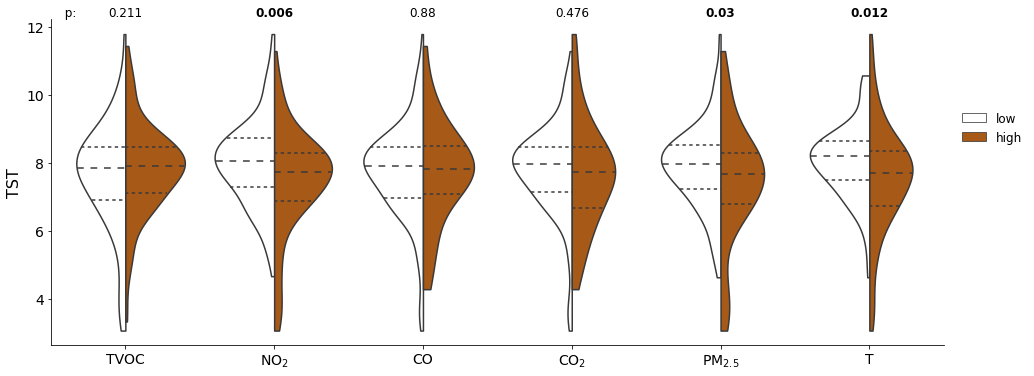

Running for: rem2nrem


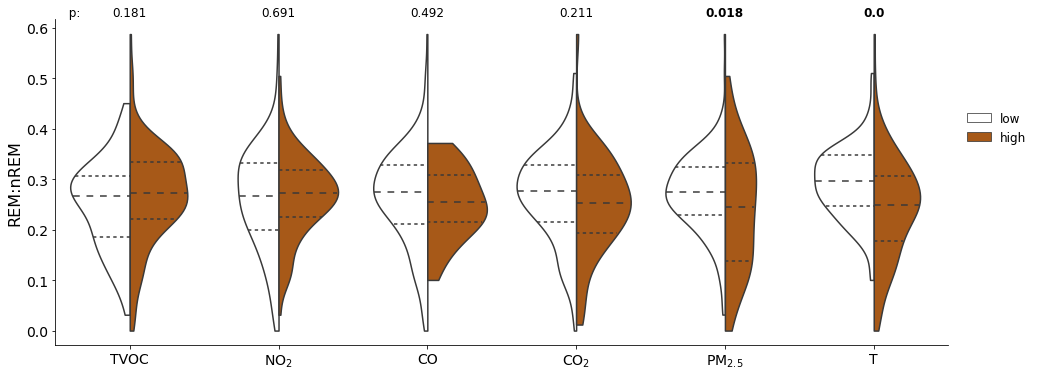

Running for: efficiency


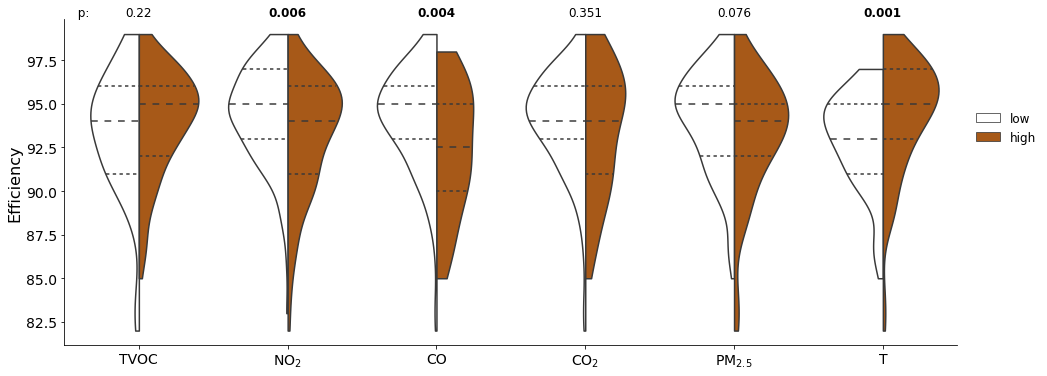

In [22]:
ieq_and_fb_sleep = ieq.merge(right=fb_sleep,on=["start_time","beiwe"])
ieq_and_fb_sleep = ieq_and_fb_sleep[ieq_and_fb_sleep["efficiency"] >= 70]
ttest_results = run_ttest_ieq_and_sleep(ieq_and_fb_sleep,save=False)

Running for: tst


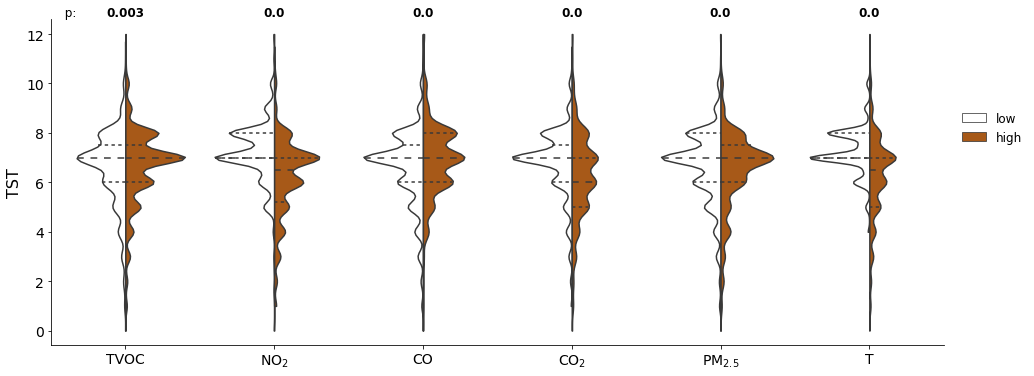

Running for: sol


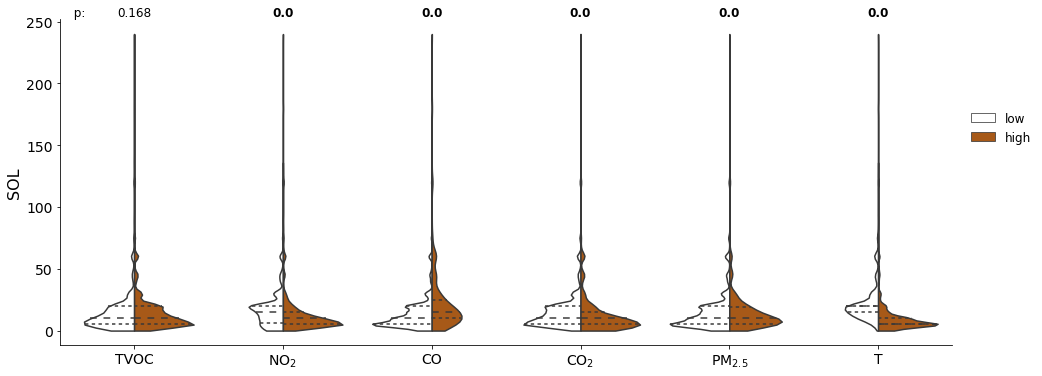

Running for: naw


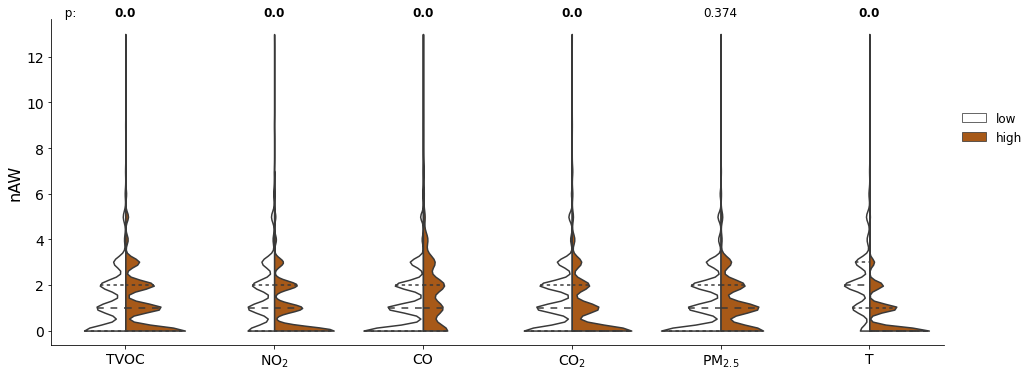

In [23]:
ieq_and_bw_sleep = ieq.merge(right=beiwe_sleep,on=["redcap","beiwe"])
ieq_and_bw_sleep.dropna(subset=["tst","sol","naw"],inplace=True)
ttest_results = run_ttest_ieq_and_sleep(ieq_and_bw_sleep,sleep_metrics=["tst","sol","naw"],save=False)

In [20]:
ttest_results["naw"]

,low,high,p_val
pollutant,,,
tvoc,4479,11854,2.315251e-07
no2,6991,9342,3.991847e-147
co,14065,2268,3.862890e-46
co2,10929,5404,1.968248e-44
pm2p5_mass,12541,3792,3.615474e-01
temperature_c,5944,10389,0.000000e+00


In [12]:
ttest_results["efficiency"]

,low,high,p_val
pollutant,,,
tvoc,67,156,0.251301
no2,120,103,0.006868
co,189,34,0.014000
co2,162,61,0.399483
pm2p5_mass,158,65,0.097347
temperature_c,91,132,0.000446
